### Car prices in Poland - Regression modeling  

In [1]:
## Import all libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neural_network import MLPRegressor
import lightgbm as ltb

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Car_Prices_Poland_Kaggle_regression_project.csv', index_col=0)
data.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [3]:
data.shape

(116633, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116633 entries, 0 to 117926
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mark        116633 non-null  object
 1   model       116633 non-null  object
 2   year        116633 non-null  int64 
 3   mileage     116633 non-null  int64 
 4   vol_engine  116633 non-null  int64 
 5   fuel        116633 non-null  object
 6   city        116633 non-null  object
 7   province    116633 non-null  object
 8   price       116633 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 8.9+ MB


In [5]:
data.describe()

,year,mileage,vol_engine,price
count,116633.000000,116633.000000,116633.000000,1.166330e+05
mean,2012.845121,142341.548215,1831.457486,6.885178e+04
std,5.663457,91230.543952,619.109475,8.325095e+04
min,1945.000000,1.000000,1.000000,5.000000e+02
25%,2009.000000,70000.000000,1482.000000,2.090000e+04
50%,2013.000000,148000.000000,1796.000000,4.100000e+04
75%,2017.000000,204000.000000,1995.000000,8.150000e+04
max,2022.000000,1000000.000000,7600.000000,2.399900e+06


In [6]:
## Creating a comparison table to save the model results

comparasion_table = pd.DataFrame(columns=['Model name', 'R2 score']) 

#### Model with numeric features 

In [7]:
numeric_features = ['year','mileage','vol_engine']

X = data[numeric_features]
y = data.price

In [8]:
X

,year,mileage,vol_engine
0,2015,139568,1248
1,2018,31991,1499
2,2015,278437,1598
3,2016,47600,1248
4,2014,103000,1400
...,...,...,...
117922,2020,40000,1969
117923,2017,51000,1969
117924,2016,83500,1969
117925,2017,174000,1969


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=12)

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)
r2 = r2_score(y_test, model.predict(X_test))
r2

0.5954569501758545

In [11]:
comparasion_table = comparasion_table.append(pd.DataFrame([['LinearRegression with numeric features',r2]], columns=['Model name', 'R2 score']))

#### One-Hot encode without model column

In [12]:
X = data.drop(['price','model', 'city'], axis=1)
y = data.price

In [13]:
X

,mark,year,mileage,vol_engine,fuel,province
0,opel,2015,139568,1248,Diesel,Mazowieckie
1,opel,2018,31991,1499,Diesel,Śląskie
2,opel,2015,278437,1598,Diesel,Opolskie
3,opel,2016,47600,1248,Diesel,Opolskie
4,opel,2014,103000,1400,CNG,Śląskie
...,...,...,...,...,...,...
117922,volvo,2020,40000,1969,Hybrid,Śląskie
117923,volvo,2017,51000,1969,Diesel,Łódzkie
117924,volvo,2016,83500,1969,Gasoline,Pomorskie
117925,volvo,2017,174000,1969,Diesel,Wielkopolskie


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=12)

In [15]:
X_train_f = pd.get_dummies(X_train)
X_test_f = pd.get_dummies(X_test)

In [16]:
model = LinearRegression()
model.fit(X_train_f,y_train)
r2_score(y_test, model.predict(X_test_f))

0.6398931514159971

In [17]:
comparasion_table = comparasion_table.append(pd.DataFrame([['LinearRegression - one-hot without model',r2_score(y_test, model.predict(X_test_f))]], columns=['Model name', 'R2 score']))

#### One-Hot encode with model column

In [19]:
X = data.drop(['price', 'city'], axis=1)
y = data.price

In [20]:
X

,mark,model,year,mileage,vol_engine,fuel,province
0,opel,combo,2015,139568,1248,Diesel,Mazowieckie
1,opel,combo,2018,31991,1499,Diesel,Śląskie
2,opel,combo,2015,278437,1598,Diesel,Opolskie
3,opel,combo,2016,47600,1248,Diesel,Opolskie
4,opel,combo,2014,103000,1400,CNG,Śląskie
...,...,...,...,...,...,...,...
117922,volvo,xc-90,2020,40000,1969,Hybrid,Śląskie
117923,volvo,xc-90,2017,51000,1969,Diesel,Łódzkie
117924,volvo,xc-90,2016,83500,1969,Gasoline,Pomorskie
117925,volvo,xc-90,2017,174000,1969,Diesel,Wielkopolskie


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=12)

In [22]:
X_train_f = pd.get_dummies(X_train)
X_test_f = pd.get_dummies(X_test)

In [23]:
X_train_f.shape

(104969, 369)

In [24]:
X_test_f.shape 

(11664, 366)

In [25]:
X_train_f = X_train_f.drop(['model_i3','model_omega', 'model_rs-q3'], axis=1) ## I drop this columns because there was a problem with names of columns after one-hot encoding 

In [26]:
model = LinearRegression()
model.fit(X_train_f,y_train)
r2 = r2_score(y_test, model.predict(X_test_f))
r2

0.7568894081253743

In [27]:
comparasion_table = comparasion_table.append(pd.DataFrame([['LinearRegression - one-hot with model',r2]], columns=['Model name', 'R2 score']))

#### Other regression models

**StandardScaler**

In [28]:
scaler = StandardScaler() 
scaler.fit(X_train_f)

X_train_scal = scaler.transform(X_train_f) 
X_test_scal = scaler.transform(X_test_f)  

In [29]:
model = LinearRegression()
model.fit(X_train_scal,y_train)
r2 = r2_score(y_test, model.predict(X_test_scal))
r2

0.7562172814447952

In [30]:
comparasion_table = comparasion_table.append(pd.DataFrame([['LinearRegression - StandardScaler',r2]], columns=['Model name', 'R2 score']))

**RIDGE**

In [31]:
model = Ridge()
model.fit(X_train_scal, y_train)
y_pred = model.predict(X_test_scal)
r2 = r2_score(y_test, y_pred) 
r2

0.7568903181382569

In [32]:
comparasion_table = comparasion_table.append(pd.DataFrame([['LinearRegression - Ridge',r2]], columns=['Model name', 'R2 score']))

**BayesianRidge**

In [33]:
model.fit(X_train_scal, y_train)
y_pred = model.predict(X_test_scal)
r2 = r2_score(y_test, y_pred)
r2

0.7568903181382569

In [34]:
comparasion_table = comparasion_table.append(pd.DataFrame([['LinearRegression - BayesianRidge',r2]], columns=['Model name', 'R2 score']))

**LASSO**

In [35]:
model = Lasso(max_iter=1500)
model.fit(X_train_scal, y_train)
y_pred = model.predict(X_test_scal)
r2 = r2_score(y_test, y_pred) 
r2

0.7569024475426633

In [36]:
comparasion_table = comparasion_table.append(pd.DataFrame([['LinearRegression - LASSO',r2]], columns=['Model name', 'R2 score']))

#### Regression with Pipeline 

**1.Model column with polynomial variables**

In [37]:
X = data.drop(['price','city'], axis=1)
y = data.price

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=12)

X_train_f = pd.get_dummies(X_train)
X_test_f = pd.get_dummies(X_test)

X_train_f = X_train_f.drop(['model_i3','model_omega', 'model_rs-q3'], axis=1)

In [39]:
%%time

model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())
    
])
param_grid = {'model__alpha':[0.05,0.1,1,10]}  

optimizer = GridSearchCV(model, param_grid, scoring='r2', cv=10 ,n_jobs=-1)

optimizer.fit(X_train_f, y_train)

Wall time: 1min 24s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1, param_grid={'model__alpha': [0.05, 0.1, 1, 10]},
             scoring='r2')

In [40]:
optimizer.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=1))])

In [41]:
optimizer.best_score_

0.771273844257726

In [42]:
optimizer.cv_results_

{'mean_fit_time': array([7.68926783, 7.27901189, 7.3234792 , 7.36870604]),
 'std_fit_time': array([0.32635319, 0.16146578, 0.1093967 , 0.15223579]),
 'mean_score_time': array([0.193734  , 0.20620294, 0.18746083, 0.19955871]),
 'std_score_time': array([0.03439441, 0.04295088, 0.02208888, 0.05681168]),
 'param_model__alpha': masked_array(data=[0.05, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__alpha': 0.05},
  {'model__alpha': 0.1},
  {'model__alpha': 1},
  {'model__alpha': 10}],
 'split0_test_score': array([0.79119221, 0.79119213, 0.7911906 , 0.79116816]),
 'split1_test_score': array([0.76999361, 0.76999359, 0.76999314, 0.76998668]),
 'split2_test_score': array([0.78997977, 0.78997966, 0.78997783, 0.78995835]),
 'split3_test_score': array([0.76428753, 0.76428766, 0.76428989, 0.76429916]),
 'split4_test_score': array([0.77479699, 0.77479699, 0.77479688, 0.77479211]),
 'split5_test_score': array([0.7

In [43]:
comparasion_table = comparasion_table.append(pd.DataFrame([['Pipeline', optimizer.best_score_]], columns=['Model name', 'R2 score']))

**2. Polynomial variables without model column**

In [44]:
X = data.drop(['price','city'], axis=1)
y = data.price

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=12)

X_train_f = pd.get_dummies(X_train)
X_test_f = pd.get_dummies(X_test)

X_train_f = X_train_f.drop(['model_i3','model_omega', 'model_rs-q3'], axis=1)

In [46]:
%%time

model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ("scaler", StandardScaler()),
    ("model", Ridge())   
])

param_grid = {'poly__degree':[1,2],
              'model__alpha':[0.05,0.1,1,10]} 
                                        
optimizer = GridSearchCV(model, param_grid, scoring='r2', cv=10 ,n_jobs=-1)

optimizer.fit(X_train_f, y_train)

Wall time: 1min 43s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.05, 0.1, 1, 10],
                         'poly__degree': [1, 2]},
             scoring='r2')

In [47]:
optimizer.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('model', Ridge(alpha=1))])

In [48]:
optimizer.best_score_

0.7712738442577264

In [49]:
optimizer.best_params_

{'model__alpha': 1, 'poly__degree': 1}

In [51]:
comparasion_table = comparasion_table.append(pd.DataFrame([['Pipeline + Polynomial variables', optimizer.best_score_]], columns=['Model name', 'R2 score']))


#### Decision Tree

In [52]:
X = data.drop(['price','city'], axis=1)
y = data.price

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=12)

X_train_f = pd.get_dummies(X_train)
X_test_f = pd.get_dummies(X_test)

X_train_f = X_train_f.drop(['model_i3','model_omega', 'model_rs-q3'], axis=1)

In [55]:
model = DecisionTreeRegressor(min_samples_leaf=30, max_depth=7)
model.fit(X_train_f, y_train)
r2 = r2_score(y_test, model.predict(X_test_f))
r2

0.843089999141841

In [56]:
comparasion_table = comparasion_table.append(pd.DataFrame([['Decision Tree', r2]], columns=['Model name', 'R2 score']))

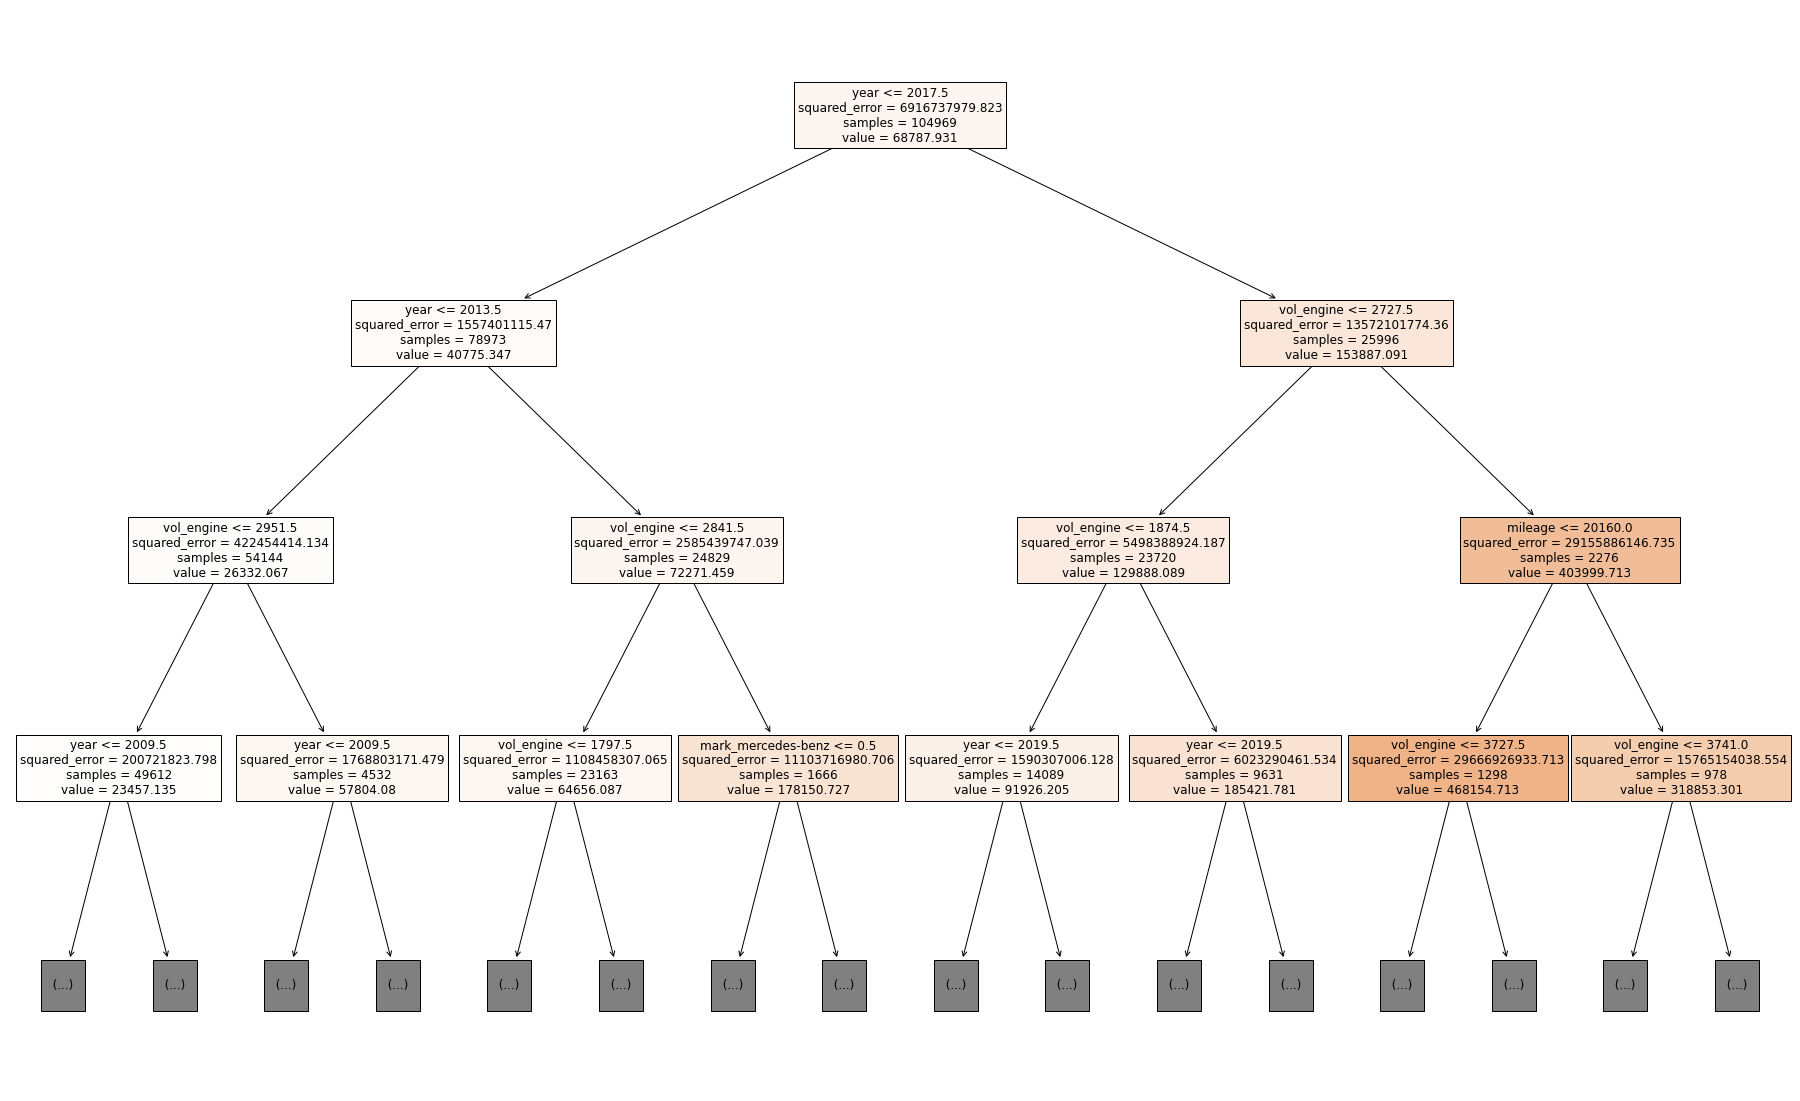

In [57]:
plt.figure(figsize=(32,20))
plot_tree(model, feature_names=X_train_f.columns, max_depth=3, fontsize=12, filled=True)
plt.show()

#### Decision Tree with Pipeline

In [58]:
%%time

model = Pipeline([("model", DecisionTreeRegressor())])

param_grid = {'model__ccp_alpha':[0.1,0.25,0.5,0.75,1],
              'model__max_depth':[5,7,10,15],
              'model__min_samples_split':[1,2,3,4,5],
              "model__min_samples_leaf":[30,50,100]}

optimizer = GridSearchCV(model, param_grid, scoring='r2', cv=3 ,n_jobs=-1)

optimizer.fit(X_train_f, y_train)

Wall time: 16min 46s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'model__ccp_alpha': [0.1, 0.25, 0.5, 0.75, 1],
                         'model__max_depth': [5, 7, 10, 15],
                         'model__min_samples_leaf': [30, 50, 100],
                         'model__min_samples_split': [1, 2, 3, 4, 5]},
             scoring='r2')

In [59]:
optimizer.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeRegressor(ccp_alpha=0.5, max_depth=15,
                                       min_samples_leaf=30,
                                       min_samples_split=3))])

In [60]:
optimizer.best_params_

{'model__ccp_alpha': 0.5,
 'model__max_depth': 15,
 'model__min_samples_leaf': 30,
 'model__min_samples_split': 3}

In [61]:
optimizer.best_score_

0.8968641688217902

In [62]:
comparasion_table = comparasion_table.append(pd.DataFrame([['Decision Tree + Pipeline', optimizer.best_score_]], columns=['Model name', 'R2 score']))

#### AdaBoostRegressor

In [63]:
model = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=100)

In [64]:
model.fit(X_train_f, y_train)
y_pred = model.predict(X_test_f)
r2 = r2_score(y_test, y_pred)
r2

0.8904465431635497

In [65]:
comparasion_table = comparasion_table.append(pd.DataFrame([['Random Forest', r2]], columns=['Model name', 'R2 score']))

#### XGBRegressor

In [67]:
param_dists = {"n_estimators": randint(20, 100),
               "learning_rate": uniform(0.01, 0.3),
               "max_depth": [5,6,7],
               "min_child_weight": randint(1, 10),
               "subsample": [0.7, 0.5, 0.3],
               "colsample_bytree": [0.7, 0.5, 0.3],
               "gamma": uniform(0.01, 0.2),
               "reg_lambda": uniform(0.01, 0.2)}

In [69]:
%%time
model = XGBRegressor()
optimizer = RandomizedSearchCV(model, param_dists, 
                               n_iter=20,
                               scoring="r2", 
                               cv=5)
optimizer.fit(X_train_f, y_train)

Wall time: 46min 57s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024D2680C7C0>,
                                        'max_depth': [5, 6

In [70]:
optimizer.best_score_

0.9326595692273909

In [71]:
optimizer.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.05338743626625115,
 'learning_rate': 0.1755391728495306,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 91,
 'reg_lambda': 0.19216524723035902,
 'subsample': 0.5}

In [72]:
optimizer.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.05338743626625115, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1755391728495306,
             max_delta_step=0, max_depth=7, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=91, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.19216524723035902, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
comparasion_table = comparasion_table.append(pd.DataFrame([['XGBRegressor', optimizer.best_score_]], columns=['Model name', 'R2 score']))

#### Neural Network - Multilayer Perceptron 

In [74]:
model = MLPRegressor((32,32,32,32), 'relu', 
                     max_iter=100, 
                     early_stopping=True,
                     validation_fraction=0.1, 
                     n_iter_no_change=5)

model.fit(X_train_f, y_train)
r2 = r2_score(y_test, model.predict(X_test_f))
r2

0.8039658384695832

In [75]:
comparasion_table = comparasion_table.append(pd.DataFrame([['Multilayer Perceptron', r2]], columns=['Model name', 'R2 score']))

#### LGBMRegressor

In [76]:
model = ltb.LGBMRegressor()
model.fit(X_train_f, y_train)
r2 = r2_score(y_test, model.predict(X_test_f))
r2

0.9227882988345447

In [77]:
comparasion_table = comparasion_table.append(pd.DataFrame([['LGBMRegressor', r2]], columns=['Model name', 'R2 score']))

#### Summary  

In [78]:
comparasion_table

,Model name,R2 score
0,LinearRegression with numeric features,0.595457
0,LinearRegression - one-hot without model,0.639893
0,LinearRegression - one-hot with model,0.756889
0,LinearRegression - StandardScaler,0.756217
0,LinearRegression - Ridge,0.756890
0,LinearRegression - BayesianRidge,0.756890
0,LinearRegression - LASSO,0.756902
0,Pipeline,0.771274
0,Pipeline + Polynomial variables,0.771274
0,Decision Tree,0.843090
